In [23]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

In [39]:
moons = make_moons(n_samples = 1000, noise = 0.05)
x = moons[0]
y = moons[1]
len(y)

1000

In [60]:
dbscan = DBSCAN(min_samples = 5, eps = 0.05)
dbscan.fit(x)
# print(dbscan.labels_)         #-1 in labels means that they are considered as anomalies by the algorithm.
len(dbscan.labels_)

1000

In [58]:
# print(dbscan.labels_[dbscan.core_sample_indices_])
print(len(dbscan.labels_[dbscan.core_sample_indices_]))

777


777

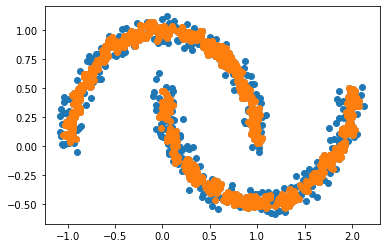

In [57]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(dbscan.components_[:,0],dbscan.components_[:,1])
len(dbscan.components_)


In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
neighbors = KNeighborsClassifier(n_neighbors= 1)
neighbors.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])
y_pred = neighbors.predict(dbscan.components_)

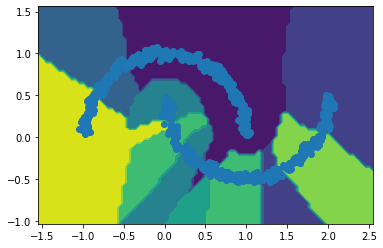

In [78]:
x0_min, x0_max = min(dbscan.components_[:,0])- 0.5, max(dbscan.components_[:,0])+ 0.5 
x1_min, x1_max = min(dbscan.components_[:,1])- 0.5, max(dbscan.components_[:,1])+ 0.5 
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.05), np.arange(x1_min, x1_max,0.05))

z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx, yy, Z)
plt.scatter(dbscan.components_[:,0], dbscan.components_[:,1])